<a href="https://colab.research.google.com/github/muhammed08/AutoEncoder-for-Images/blob/master/Bi_Main_LSTM_ForeCastCashflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#install libraries for usage
!pip install simfin
!pip install chart_studio
!pip install xlrd
!pip install seaborn
!pip install chart_studio
!pip install plotly
!pip install pandas_datareader
!pip install mpl_finance

     |████████████████████████████████| 61kB 4.5MB/s 
     |████████████████████████████████| 71kB 4.9MB/s 


In [2]:
#import libraries for usage
import numpy as np
import pandas as pd
import xlrd
import matplotlib.pyplot as plt
import scipy as sp
import chart_studio
import simfin as sf
import os
import seaborn as sns
import plotly
sns.set()
import time
import chart_studio.plotly as py
import plotly.graph_objs as go

from statsmodels.graphics.tsaplots import plot_acf  
from statsmodels.tsa.stattools import adfuller as ADF  
from statsmodels.graphics.tsaplots import plot_pacf    
from statsmodels.stats.diagnostic import acorr_ljungbox    
from statsmodels.tsa.arima_model import ARIMA


import pandas_datareader as web
import datetime
import matplotlib.pyplot as plt
from matplotlib import ticker as mticker
import mpl_finance as mpl

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [3]:
#function to download data of particular ticker
def DownloadData(Ticker):

    sf.set_api_key('free')
    sf.set_data_dir(os.getcwd())

    Cashflow_Statement =  sf.load_cashflow(variant='quarterly', market='us')
    
    DataInformation_Cashflow = Cashflow_Statement.loc[Ticker]
   
    DataInformation_Cashflow.to_excel(Ticker+"-cashflow-data.xlsx")

    print('\n')

    print(DataInformation_Cashflow.head())
    [print(x) for x in DataInformation_Cashflow.columns]

    return DataInformation_Cashflow

In [4]:

sf.set_api_key('free')
sf.set_data_dir(os.getcwd())
#download all company in US market
df_companies = sf.load_companies(market='us')

Dataset "us-companies" on disk (0 days old).
- Loading from disk ... Done!


In [5]:
#download all industry data
df_industries = sf.load_industries()

Dataset "industries" on disk (0 days old).
- Loading from disk ... Done!


In [6]:
#Industry Data
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df_industries)

                        Sector                                 Industry
IndustryId                                                             
100001             Industrials                      Industrial Products
100002             Industrials                        Business Services
100003             Industrials               Engineering & Construction
100004             Industrials                         Waste Management
100005             Industrials                  Industrial Distribution
100006             Industrials                                 Airlines
100007             Industrials                 Consulting & Outsourcing
100008             Industrials                      Aerospace & Defense
100009             Industrials            Farm & Construction Machinery
100010             Industrials               Transportation & Logistics
100011             Industrials                      Employment Services
100012             Industrials                      Truck Manufa

In [7]:
#get all tech ticker
df_ticker_tech=df_companies[df_companies['IndustryId'].isin([101001.0,101002.0,101003.0,101004.0,101005.0])]
ticker_tech=df_ticker_tech.index
ticker_tech

Index(['AAOI', 'AAPL', 'ABTL', 'ACIA', 'ACIW', 'ACLS', 'ADBE', 'ADI', 'ADSK',
       'ADT',
       ...
       'YELP', 'YEXT', 'YNDX', 'ZAYO', 'ZDGE', 'ZEN', 'ZI', 'ZM', 'ZNGA',
       'ZS'],
      dtype='object', name='Ticker', length=456)

In [8]:

top_companies = ['ARW', 'FB', 'NXPI', 'SWKS', 'MSI', 'MSFT', 'ENR', 'PAYC', 'SQ', 'DOCU', 'AMD', 'AVGO', 'SSNC', 'CRWD', 'DELL', 'WDC', 'WDAY', 'FTNT', 'M', 'DDOG', 'MRVL', 'CTSH', 'NTAP', 'NLOK', 'AMKR', 'ATVI', 'NUAN', 'TXN', 'CDK', 'OTEX', 'INTC', 'ORCL', 'EA', 'NOW', 'ADSK', 'NEWR', 'PINS', 'XLNX', 'AKAM', 'TEL', 'QCOM', 'SATS', 'PANW', 'OKTA', 'QRVO', 'VRSN', 'CA', 'ADT', 'SE', 'APH', 'VEEV', 'CDAY', 'ADI', 'INOV', 'AAPL', 'NCR', 'AMAT', 'GLW', 'BLKB', 'IBM', 'JBL', 'XRX', 'CRM', 'CSCO', 'IT', 'FSLR', 'INTU', 'CTXS', 'LDOS_old', 'ANET', 'BL', 'LYFT', 'SNPS', 'BRCM', 'ITRI', 'TRMB', 'LTRPA', 'CLOUD', 'SNAP', 'SPLK', 'ADBE', 'LITE', 'AVGO_old', 'FTV', 'NVDA', 'HQY', 'KLAC', 'VMW', 'RAMP', 'LLTC', 'MXIM', 'SYNT', 'ZNGA', 'SNDK', 'HPQ', 'GOOG', 'LRCX', 'KEYS', 'MCHP', 'ZM', 'ALTR_delis', 'PS', 'TWTR', 'HPE', 'MU', 'AVT', 'STX', 'JNPR']

req_companies = [companies for companies in ticker_tech if companies not in top_companies]
len(req_companies)

349

In [9]:
Cashflow_Statement =  sf.load_cashflow(variant='quarterly', market='us')
Cashflow_Statement.index=Cashflow_Statement.index.droplevel(1)

Dataset "us-cashflow-quarterly" not on disk.
- Downloading ... 100.0%
- Extracting zip-file ... Done!
- Loading from disk ... Done!


In [10]:
tech_data=Cashflow_Statement.loc[Cashflow_Statement.index.isin(req_companies)]
tech_data.to_excel("tech-cashflow-data.xlsx")
tech_data.head()

,SimFinId,Currency,Fiscal Year,Fiscal Period,Publish Date,Restated Date,Shares (Basic),Shares (Diluted),Net Income/Starting Line,Depreciation & Amortization,Non-Cash Items,Change in Working Capital,Change in Accounts Receivable,Change in Inventories,Change in Accounts Payable,Change in Other,Net Cash from Operating Activities,Change in Fixed Assets & Intangibles,Net Change in Long Term Investment,Net Cash from Acquisitions & Divestitures,Net Cash from Investing Activities,Dividends Paid,Cash from (Repayment of) Debt,Cash from (Repurchase of) Equity,Net Cash from Financing Activities,Net Change in Cash
Ticker,,,,,,,,,,,,,,,,,,,,,,,,,,
AAOI,671827,USD,2013,Q3,2013-11-12,2014-11-12,8995397.0,9154692.0,391000.0,877000.0,262000.0,-5492000.0,NaN,NaN,NaN,NaN,-3962000.0,-1733000.0,NaN,NaN,-1161000.0,NaN,3936000.0,-1214000.0,2722000.0,-2443000
AAOI,671827,USD,2013,Q4,2014-02-12,2016-03-14,30327591.0,30168296.0,-521000.0,971000.0,999000.0,-5185000.0,NaN,NaN,NaN,NaN,-3736000.0,-4943000.0,NaN,NaN,-12657000.0,NaN,-1374000.0,32785000.0,31411000.0,14681000
AAOI,671827,USD,2014,Q1,2014-05-12,2015-12-21,12792322.0,13787580.0,85000.0,1239000.0,760000.0,-2805000.0,NaN,NaN,NaN,NaN,-721000.0,-8700000.0,NaN,NaN,-8781000.0,NaN,-5925000.0,45778000.0,39853000.0,30405000
AAOI,671827,USD,2014,Q2,2014-08-12,2015-12-21,14785437.0,15641694.0,1919000.0,1431000.0,1014000.0,-3425000.0,NaN,NaN,NaN,NaN,939000.0,-7542000.0,NaN,NaN,-8491000.0,NaN,-10739000.0,71000.0,-10668000.0,-18332000
AAOI,671827,USD,2014,Q3,2014-11-12,2015-12-21,14805668.0,15594544.0,1577000.0,1679000.0,928000.0,-3737000.0,NaN,NaN,NaN,NaN,447000.0,-11723000.0,NaN,NaN,-11801000.0,NaN,13900000.0,91000.0,13991000.0,2955000


In [11]:
tech_data = pd.read_excel("tech-cashflow-data.xlsx")

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(-100,100))
scaler.fit(tech_data[['Net Cash from Operating Activities',	'Net Cash from Investing Activities',	'Net Cash from Financing Activities',	'Net Change in Cash']])

MinMaxScaler(copy=True, feature_range=(-100, 100))

In [13]:
scaler.data_max_

array([1.870000e+09, 1.230935e+09, 3.509500e+09, 2.130000e+09])

In [14]:
df1 = Cashflow_Statement.loc[Cashflow_Statement.index.isin(['ARW'])]
cleaned = scaler.transform(df1[['Net Cash from Operating Activities',	'Net Cash from Investing Activities',	'Net Cash from Financing Activities','Net Change in Cash']])
p = cleaned[:,-1:]
cleaned = cleaned[:,:-1]

In [15]:

def convert_to_sample2(DataInformation_Cashflow, scaler):
  
  df1 = DataInformation_Cashflow[["Fiscal Period","Net Cash from Financing Activities",
                                                    "Net Cash from Operating Activities",
                                                    "Net Cash from Investing Activities",
                                                    "Net Change in Cash"]]

  cleaned = scaler.transform(df1[['Net Cash from Operating Activities',	'Net Cash from Investing Activities',	'Net Cash from Financing Activities','Net Change in Cash']])

  X =[]
  y1 = []
  y2= [] 
  y3= [] 
  y4= []
  for i in range(df1.shape[0]):
    if not i+7 < df1.shape[0]:
      break
    temp = []
    if np.isnan(np.sum(cleaned)):
      break;
    for j in range(6):
      if df1.iloc[i+j,0] == 'Q1':
        z = np.append(cleaned[i+j],[1,0,0,0])
      elif df1.iloc[i+j,0] == 'Q2':
        z = np.append(cleaned[i+j],[0,1,0,0])
      elif df1.iloc[i+j,0] == 'Q3':
        z = np.append(cleaned[i+j],[0,0,1,0])
      else:
        z = np.append(cleaned[i+j],[0,0,0,1])
      temp.append(z)
      #temp.append(cleaned[i+j])
    X.append(temp)
    #y1.append(p[i+j+1])
    y1.append(cleaned[i+j+1][3])
    # y2.append(cleaned[i+j+1][1])
    # y3.append(cleaned[i+j+1][2])
    # y4.append(cleaned[i+j+1][3])

  return [X,y1,y2,y3,y4]

In [16]:

def convert_to_sample(DataInformation_Cashflow, scaler):
  
  df1 = DataInformation_Cashflow[["Fiscal Period","Net Cash from Financing Activities",
                                                    "Net Cash from Operating Activities",
                                                    "Net Cash from Investing Activities",
                                                    "Net Change in Cash"]]

  cleaned = scaler.transform(df1[['Net Cash from Operating Activities',	'Net Cash from Investing Activities',	'Net Cash from Financing Activities','Net Change in Cash']])
  p = cleaned[:,-1:]
  cleaned = cleaned[:,:-1]

  X =[]
  y1 = []
  y2= [] 
  y3= [] 
  y4= []
  for i in range(df1.shape[0]):
    if not i+7 < df1.shape[0]:
      break
    temp = []
    if np.isnan(np.sum(cleaned)):
      break;
    for j in range(6):
      if df1.iloc[i+j,0] == 'Q1':
        z = np.append(cleaned[i+j],[1,0,0,0])
      elif df1.iloc[i+j,0] == 'Q2':
        z = np.append(cleaned[i+j],[0,1,0,0])
      elif df1.iloc[i+j,0] == 'Q3':
        z = np.append(cleaned[i+j],[0,0,1,0])
      else:
        z = np.append(cleaned[i+j],[0,0,0,1])
      temp.append(z)
      #temp.append(cleaned[i+j])
    X.append(temp)
    y1.append(p[i+j+1])
    #y1.append(cleaned[i+j+1][0])
    # y2.append(cleaned[i+j+1][1])
    # y3.append(cleaned[i+j+1][2])
    # y4.append(cleaned[i+j+1][3])

  return [X,y1,y2,y3,y4]

In [17]:
X = []
y1 = []
y2= []
y3=[]
y4=[]
sizes = []
import random
random.shuffle(req_companies)

test_companies = req_companies[-25:]
for companies in req_companies[:-25]:
  data=Cashflow_Statement.loc[Cashflow_Statement.index.isin([companies])]
  if not data.empty:
    result = convert_to_sample2(data,scaler)
    sizes.append(len(result[0]))
    X = X + result[0]
    y1 = y1 + result[1]
    y2 = y2 + result[2]
    y3 = y3 + result[3]
    y4 = y4 + result[4]


In [18]:
test_data = {}
for companies in test_companies:
    data=Cashflow_Statement.loc[Cashflow_Statement.index.isin([companies])]
    if not data.empty:
      result = convert_to_sample2(data,scaler)
      sizes.append(len(result[0]))
      test_data[companies] = result

In [19]:
X[0]
x = np.array(X)
y = np.array(y1)

In [20]:
y[0]

-72.2236957045422

In [21]:
from numpy import array
from numpy import hstack
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense,Bidirectional


In [22]:
n_steps = 6
n_features = 8
model2 = Sequential()
model2.add(LSTM(10, activation='relu',return_sequences=True, input_shape=(n_steps, n_features)))
model2.add(LSTM(5, activation='relu'))
model2.add(Dense(4))
model2.add(Dense(1))
model2.compile(optimizer='adam', loss='mse')
model2.fit(x, y, epochs=200,batch_size=250)

Epoch 1/200
23/23 [==============================] - 24s 7ms/step - loss: 5437.2975
Epoch 2/200
23/23 [==============================] - 0s 8ms/step - loss: 5294.9425
Epoch 3/200
23/23 [==============================] - 0s 8ms/step - loss: 5241.8658
Epoch 4/200
23/23 [==============================] - 0s 8ms/step - loss: 5253.0697
Epoch 5/200
23/23 [==============================] - 0s 8ms/step - loss: 5231.5853
Epoch 6/200
23/23 [==============================] - 0s 9ms/step - loss: 2476.6420
Epoch 7/200
23/23 [==============================] - 0s 8ms/step - loss: 115.5207
Epoch 8/200
23/23 [==============================] - 0s 8ms/step - loss: 29.7278
Epoch 9/200
23/23 [==============================] - 0s 8ms/step - loss: 28.3047
Epoch 10/200
23/23 [==============================] - 0s 9ms/step - loss: 27.2107
Epoch 11/200
23/23 [==============================] - 0s 8ms/step - loss: 27.8313
Epoch 12/200
23/23 [==============================] - 0s 8ms/step - loss: 26.5689
Epoch 13/20

In [26]:
model3 = Sequential()
model3.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(n_steps, n_features)))
model3.add(Dense(10))
model3.add(Dense(1))
model3.compile(optimizer='adam', loss='mse')
model3.fit(x, y, epochs=200,batch_size=250)

Epoch 1/200
23/23 [==============================] - 4s 15ms/step - loss: 4993.1357
Epoch 2/200
23/23 [==============================] - 0s 16ms/step - loss: 75.0156
Epoch 3/200
23/23 [==============================] - 0s 15ms/step - loss: 34.9410
Epoch 4/200
23/23 [==============================] - 0s 15ms/step - loss: 28.5837
Epoch 5/200
23/23 [==============================] - 0s 16ms/step - loss: 26.3838
Epoch 6/200
23/23 [==============================] - 0s 15ms/step - loss: 24.7729
Epoch 7/200
23/23 [==============================] - 0s 15ms/step - loss: 25.7460
Epoch 8/200
23/23 [==============================] - 0s 16ms/step - loss: 26.2955
Epoch 9/200
23/23 [==============================] - 0s 15ms/step - loss: 24.0761
Epoch 10/200
23/23 [==============================] - 0s 15ms/step - loss: 24.1145
Epoch 11/200
23/23 [==============================] - 0s 16ms/step - loss: 25.6593
Epoch 12/200
23/23 [==============================] - 0s 15ms/step - loss: 23.8610
Epoch 13/20

In [ ]:
index = -10

In [ ]:
x_input = array(x[index])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model2.predict(x_input, verbose=0)
print(yhat)
print(y[index])

[[-74.15445]]
-72.86072672148022


In [27]:
def my_output(x_input):
  x_input = array(x_input)
  x_input = x_input.reshape((1, n_steps, n_features))
  yhat = model3.predict(x_input, verbose=0)
  return yhat

In [28]:
def my_output2(x_input):
  x_input = array(x_input)
  x_input = x_input.reshape((1, n_steps, n_features))
  yhat = model2.predict(x_input, verbose=0)
  return yhat

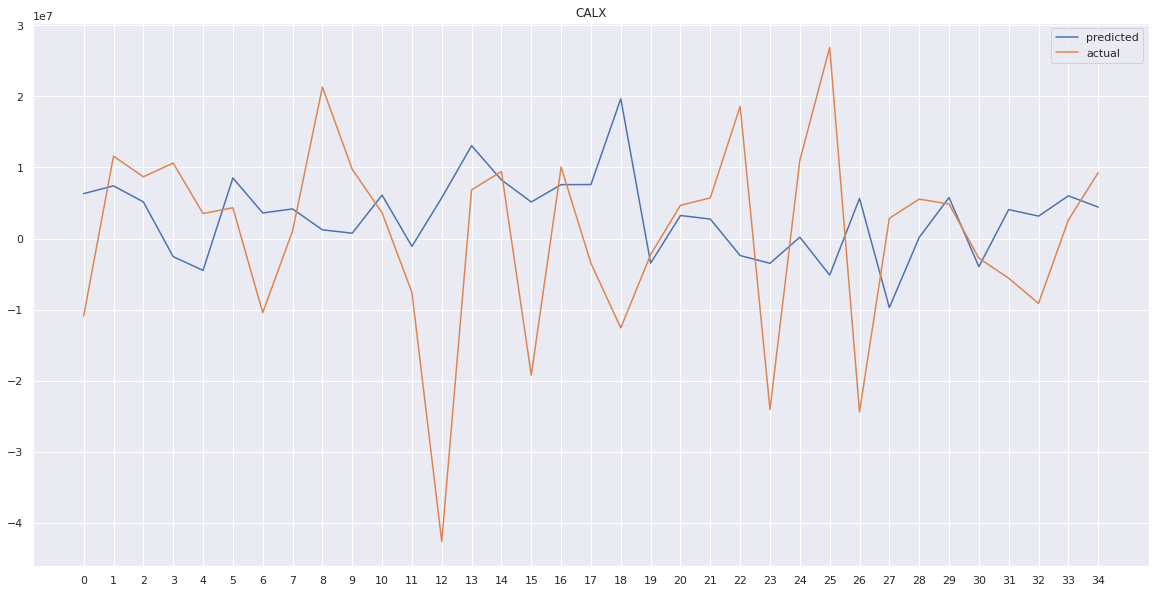

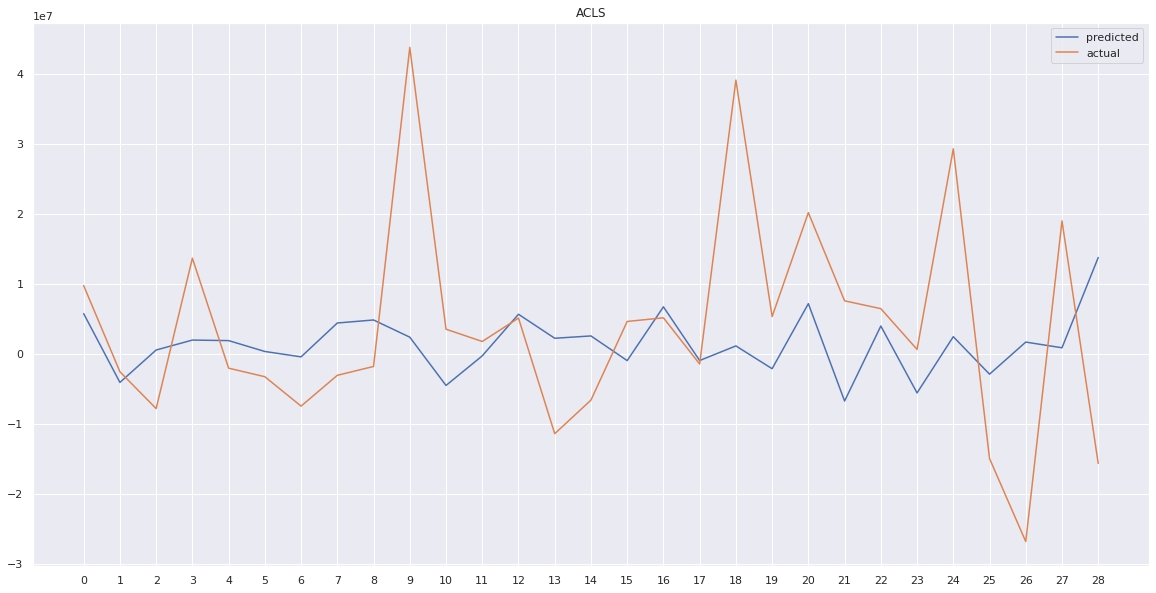

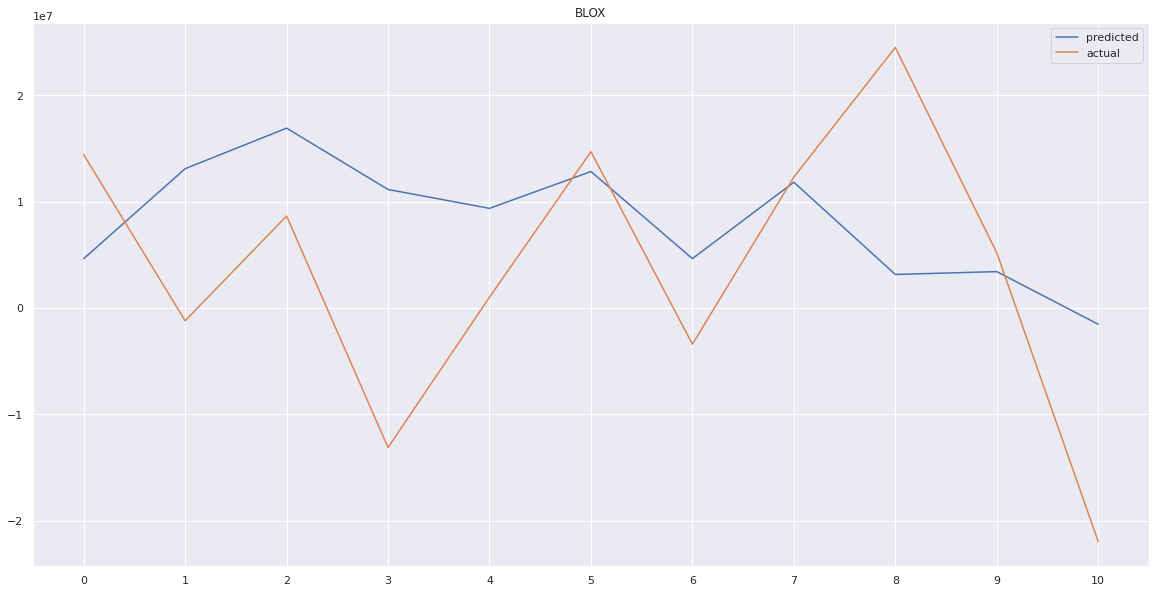

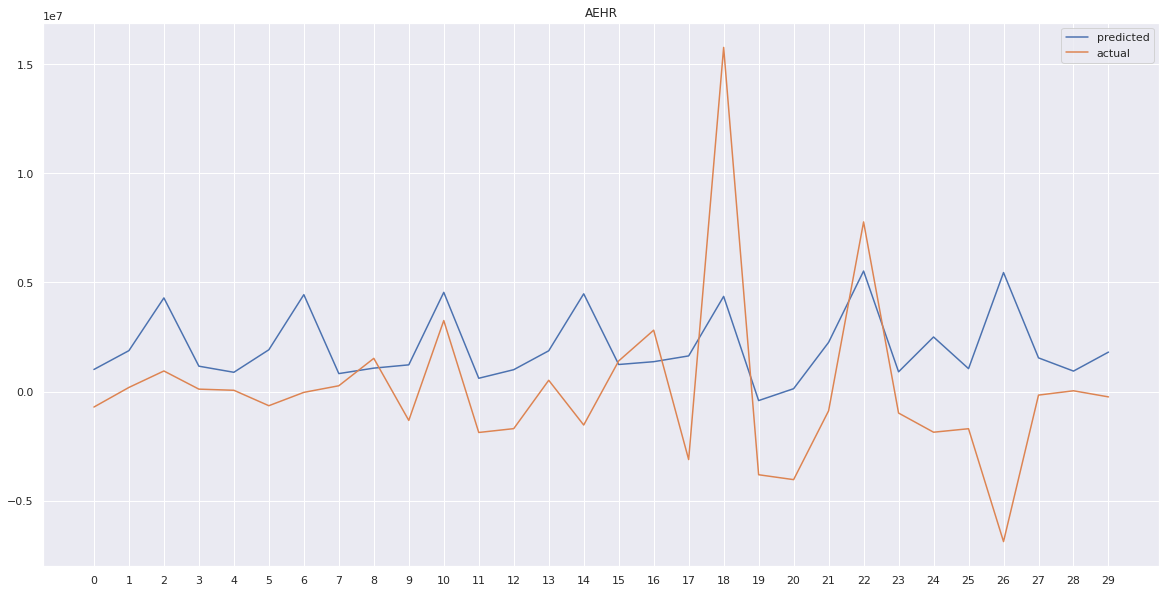

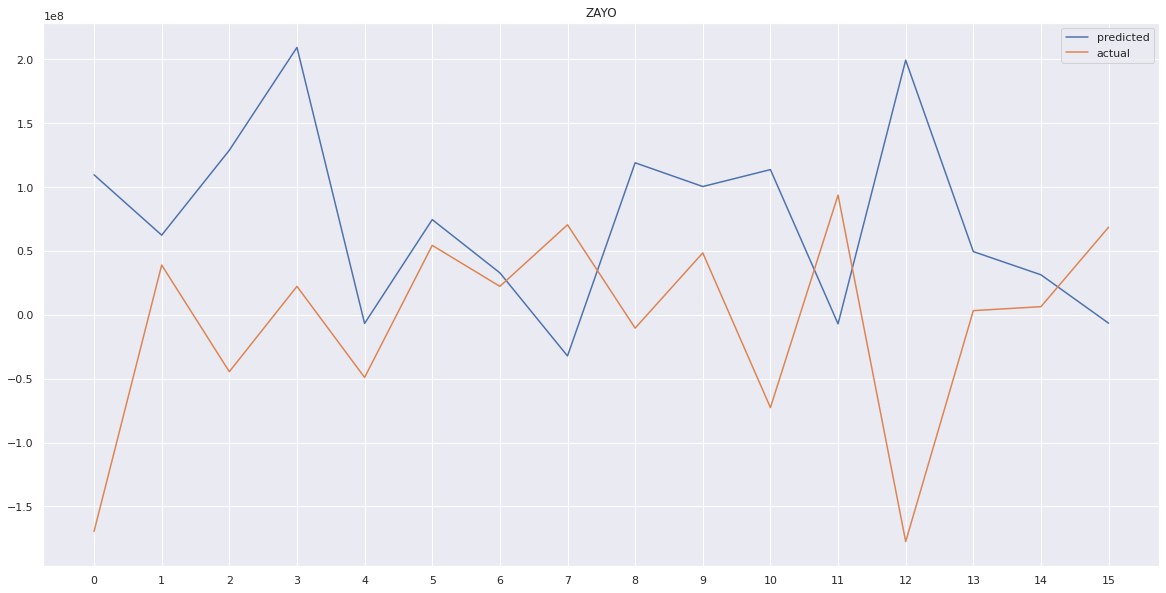

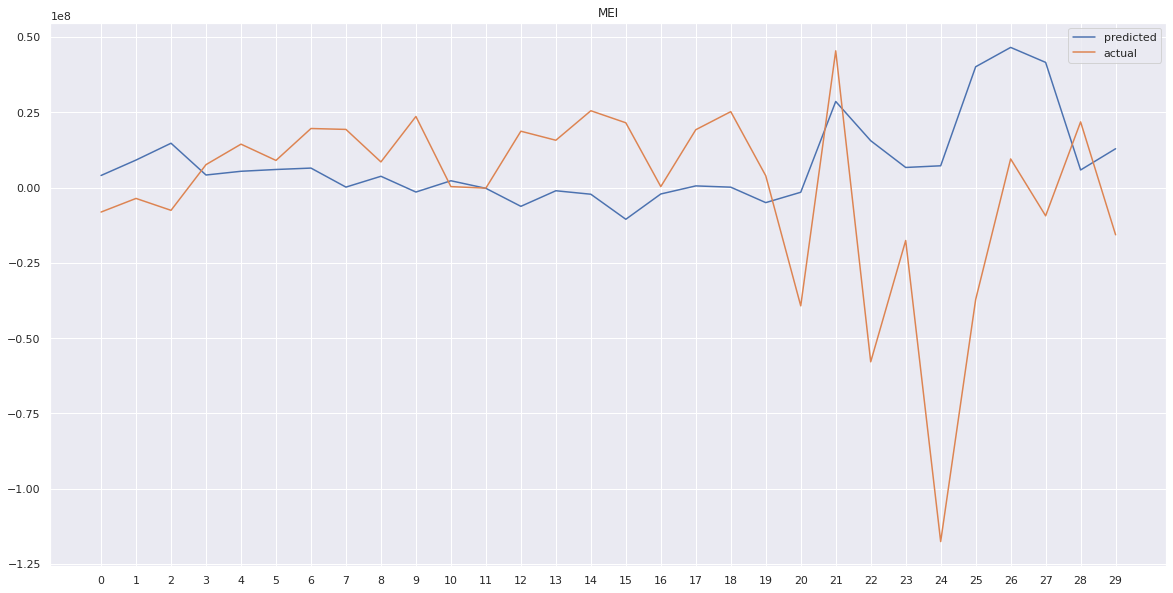

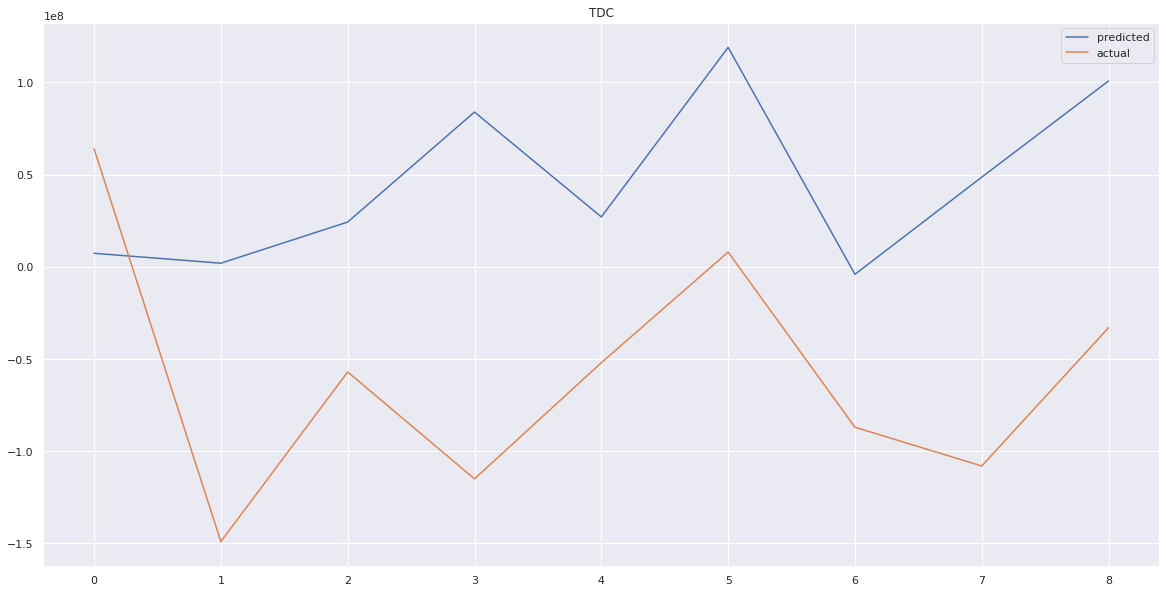

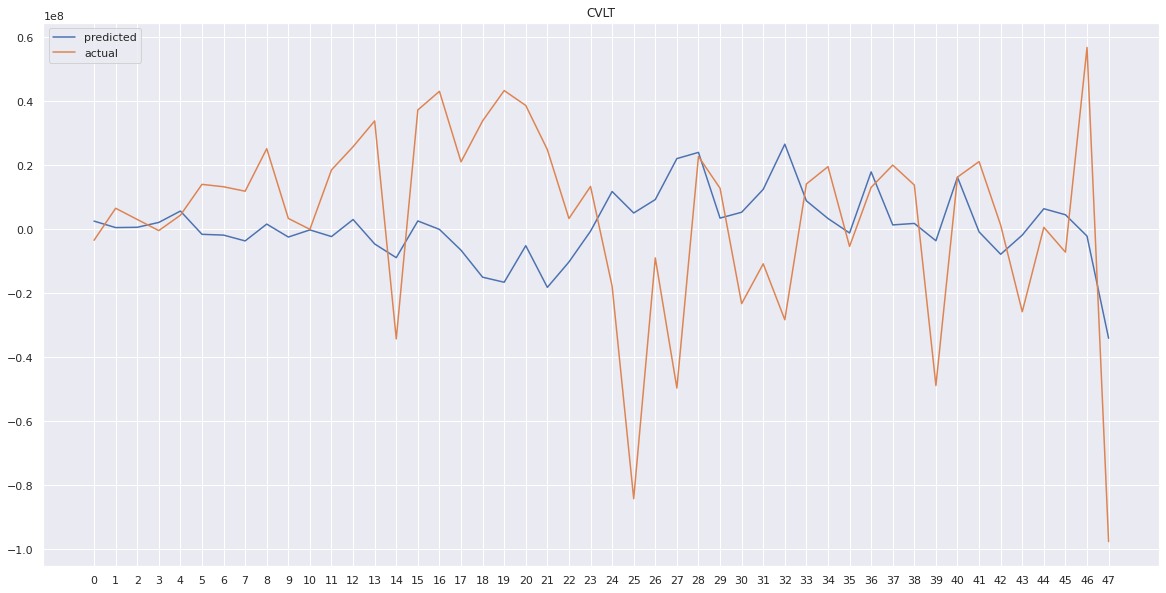

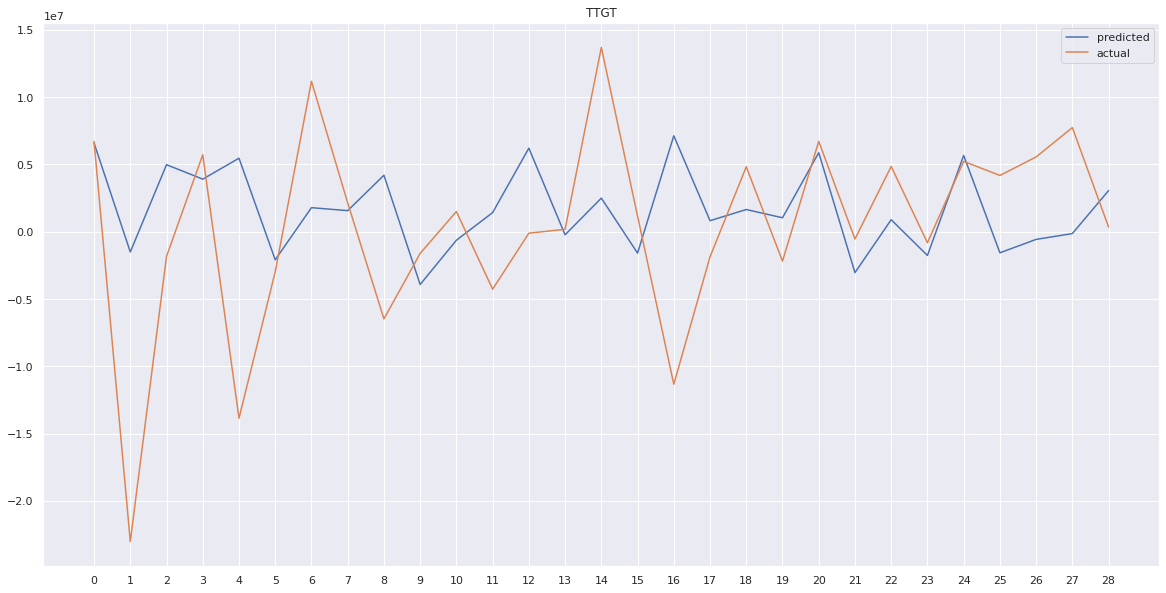

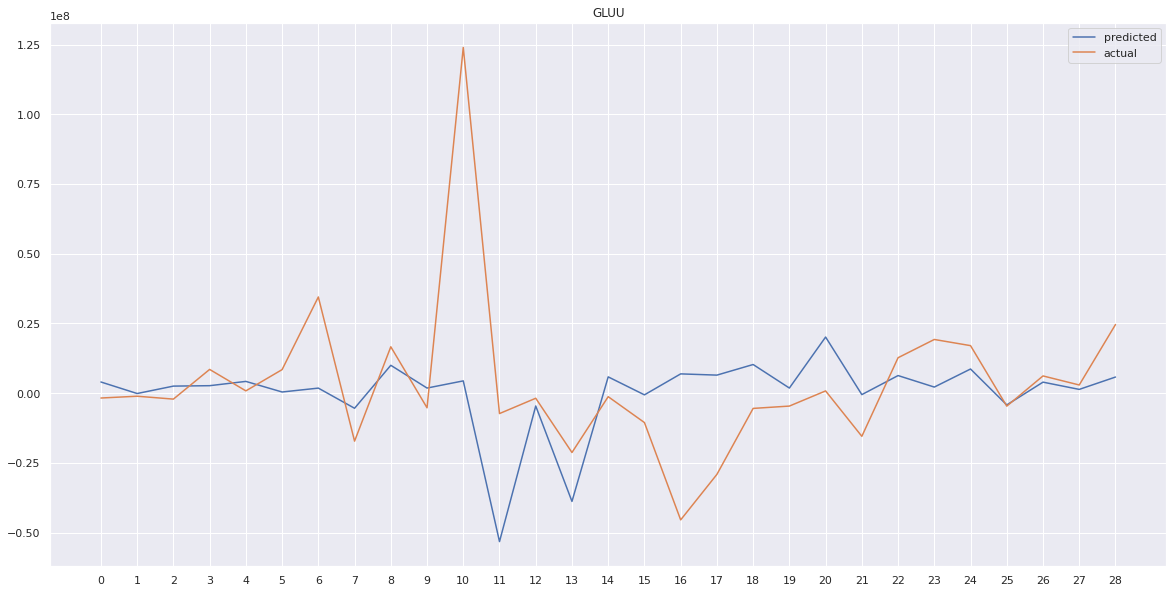

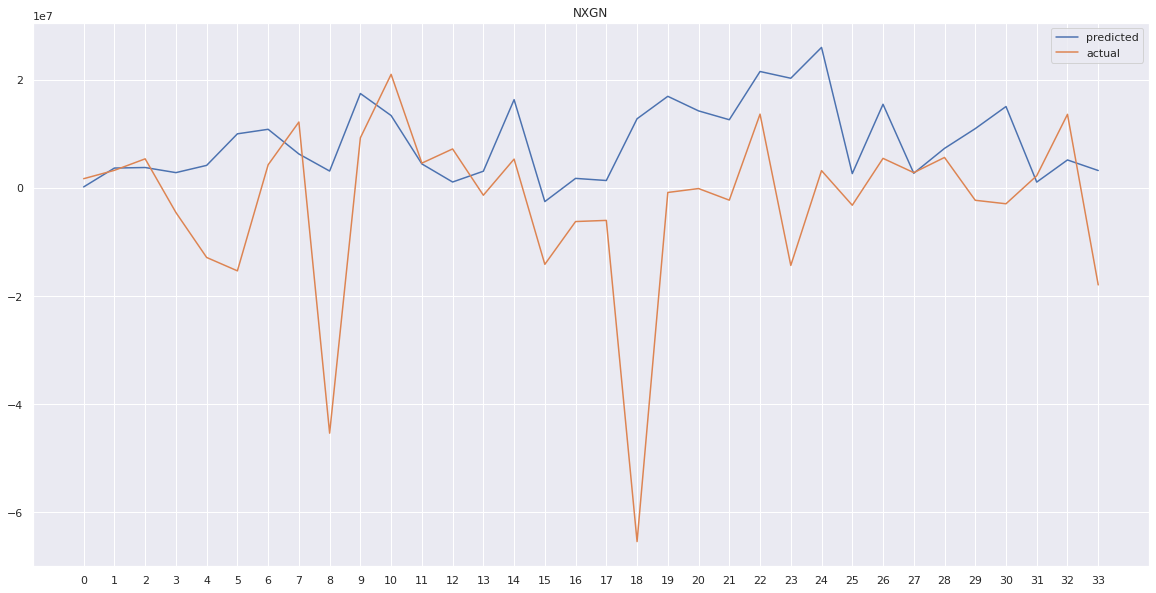

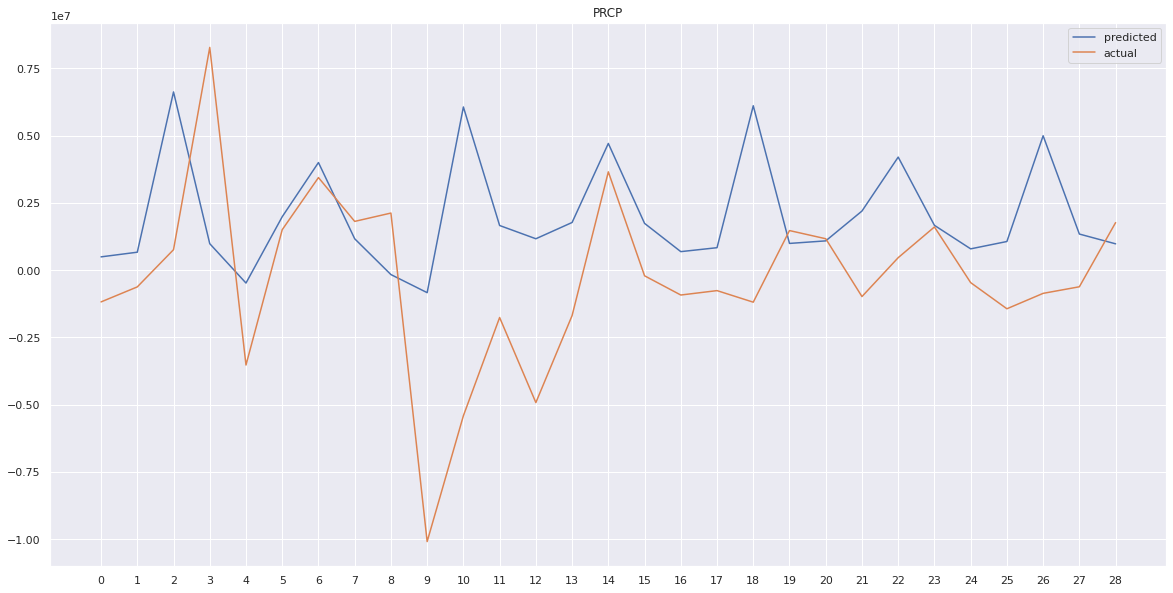

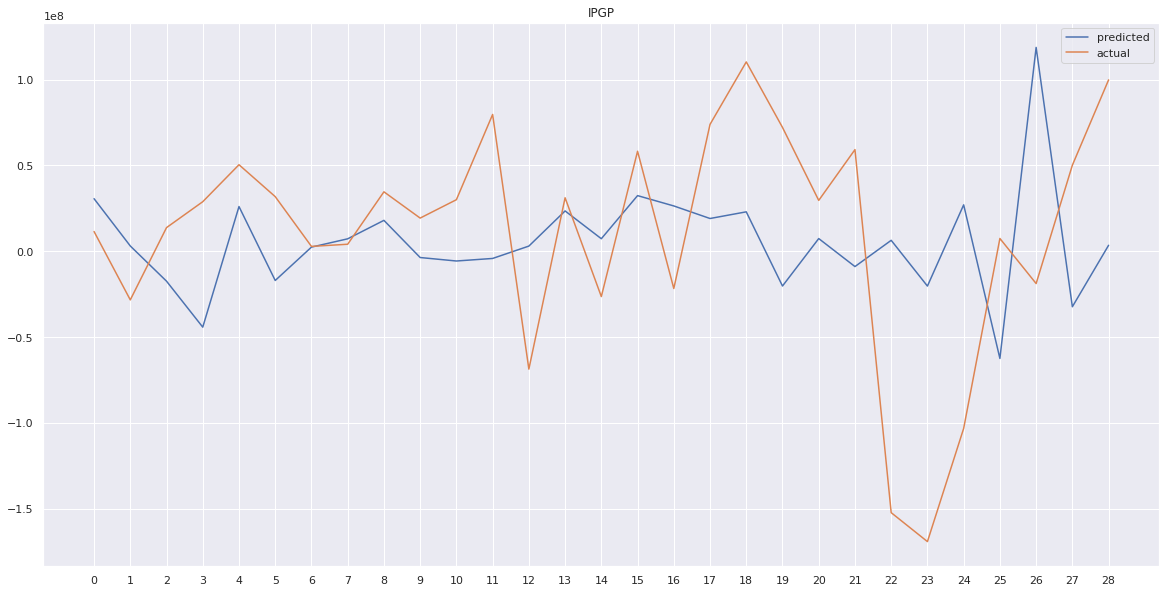

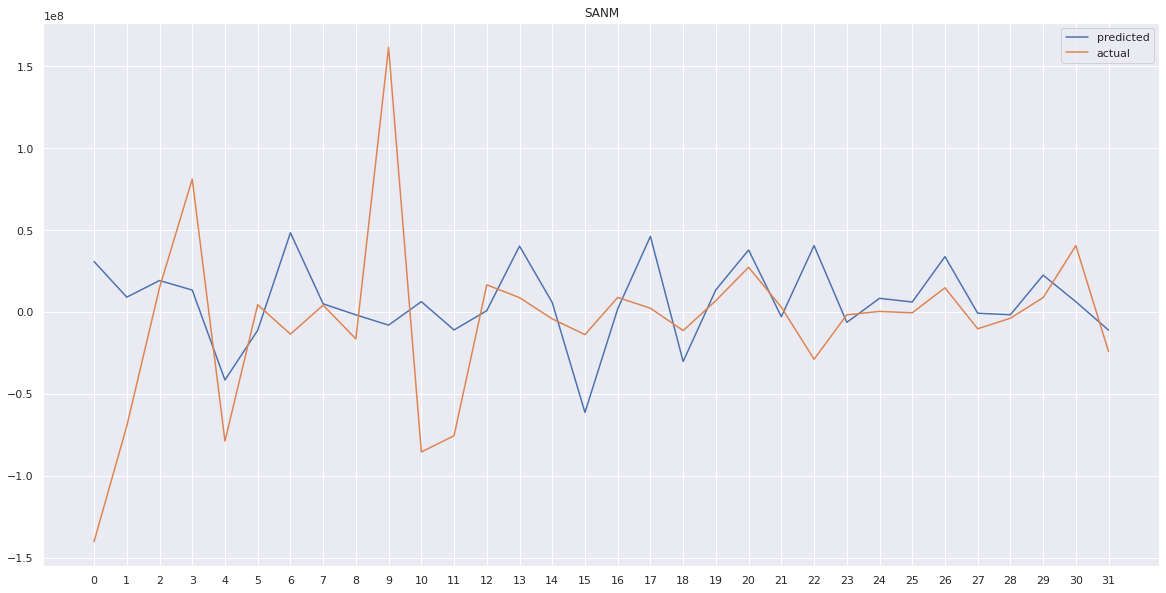

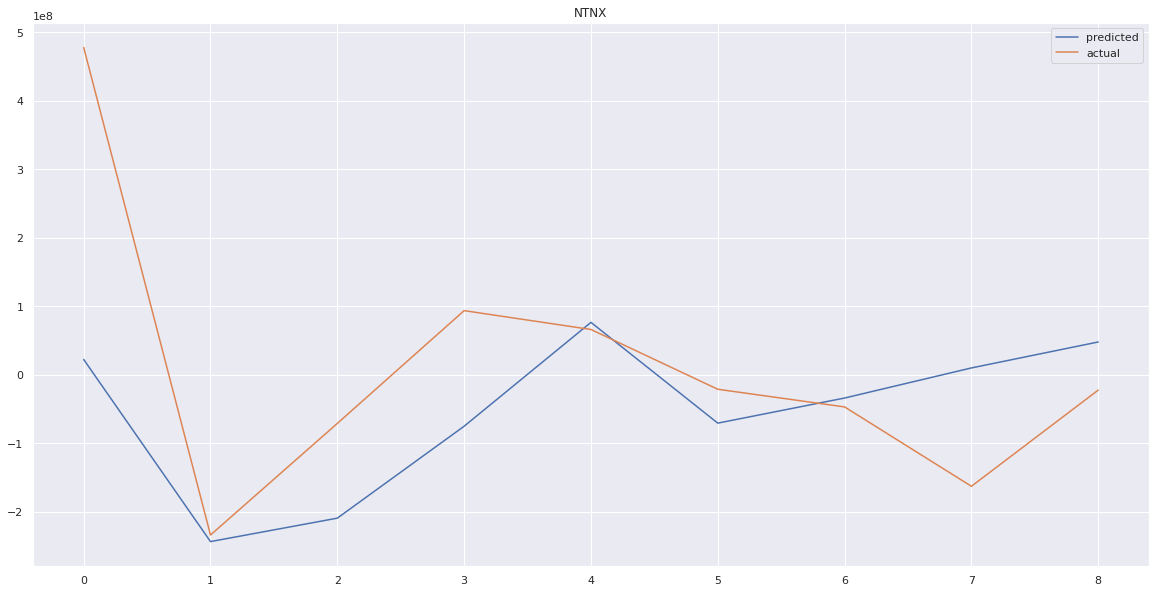

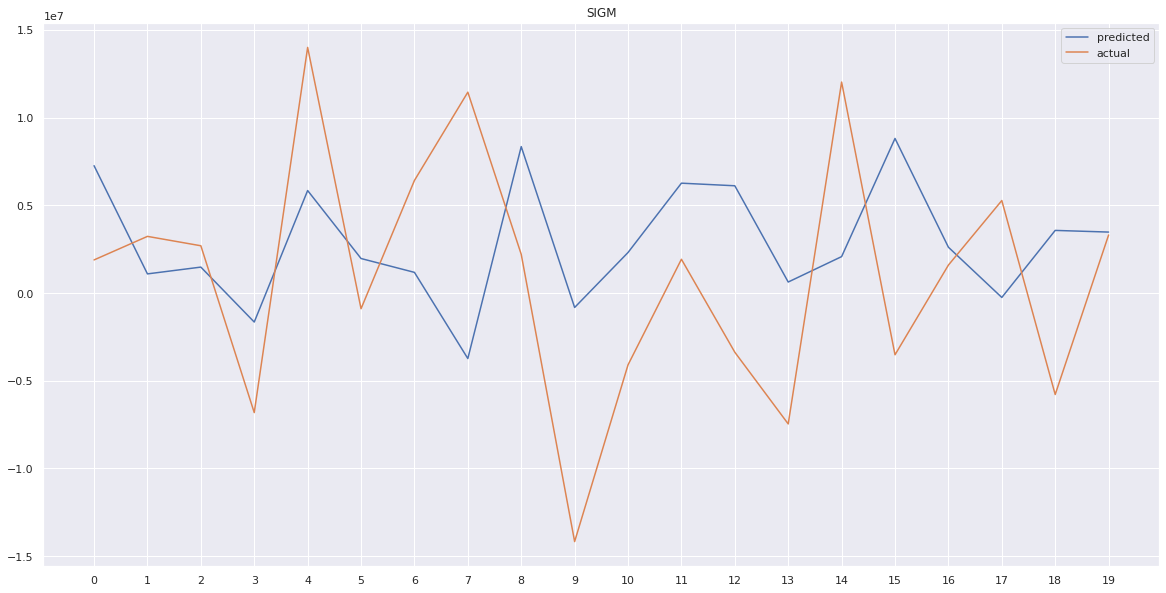

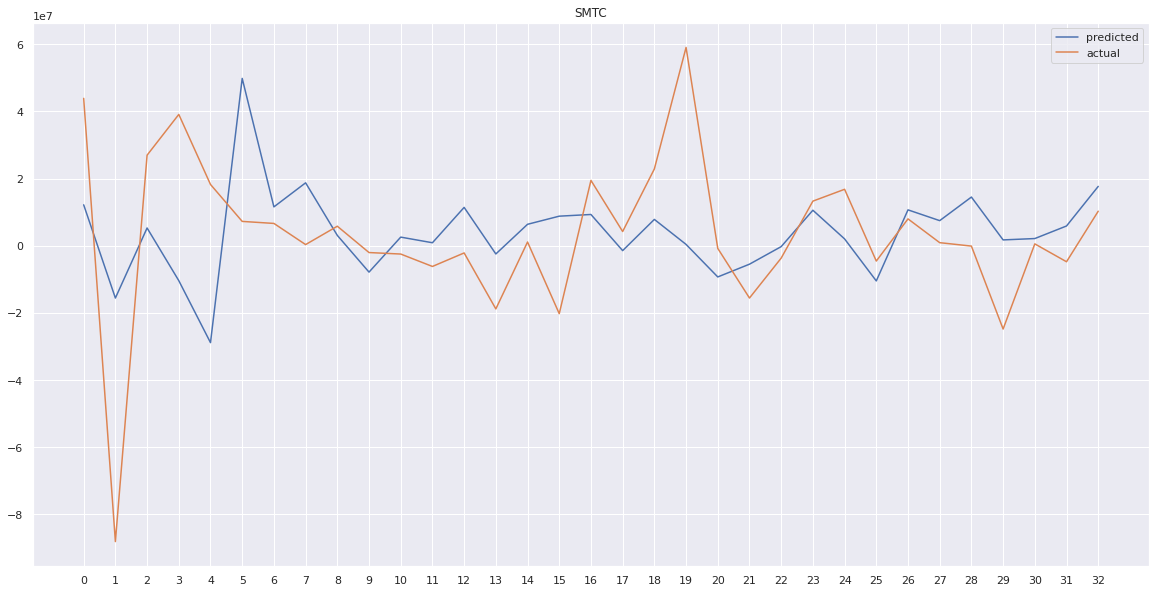

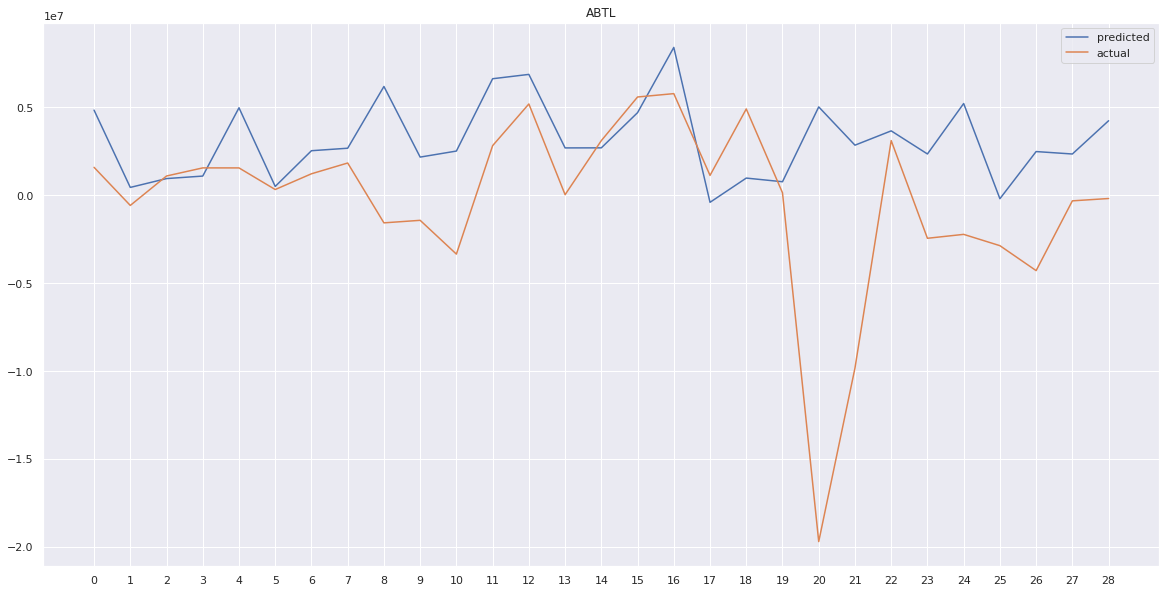

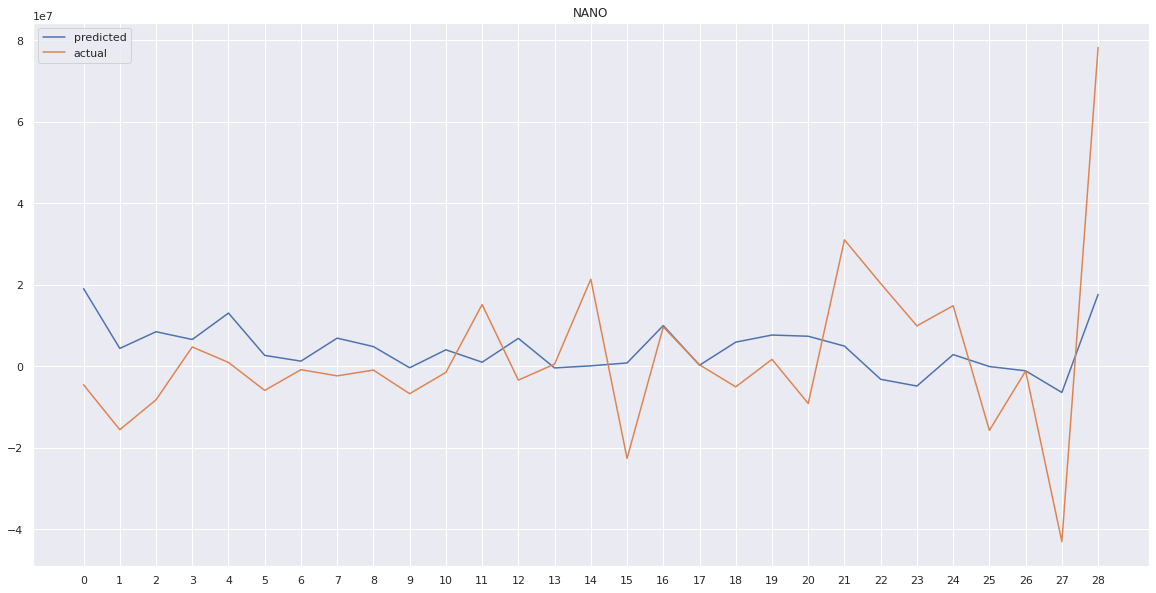

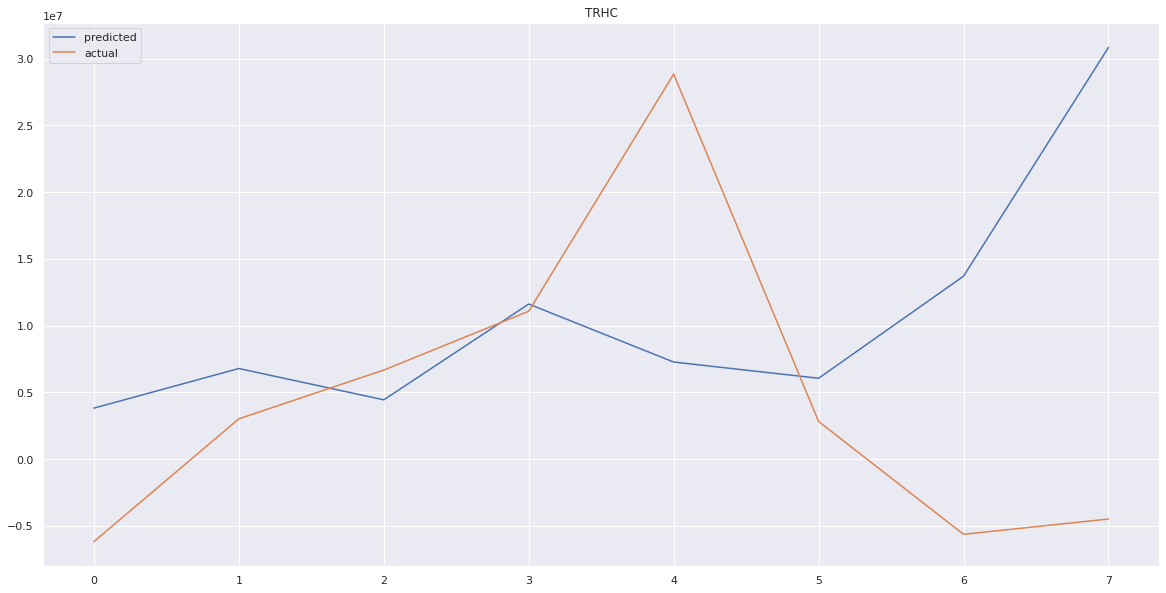

In [ ]:
from matplotlib.pyplot import figure

#figure(figsize=(15, 10), dpi=800)
for key in test_data:  
  samples = test_data[key]
  if len(samples[0]) < 7:
    continue;
  pred_list = []
  actual_list = []
  for i in range(len(samples[0])):
    prediction = my_output(samples[0][i])
    real_pred = scaler.inverse_transform([[1,1,2,prediction[0][0]]])[0][3]
    real_act =  scaler.inverse_transform([[1,1,2,samples[1][i]]])[0][3]                                                                            
    pred_list.append(real_pred)
    actual_list.append(real_act)
  q = [i for i in range(len(pred_list))]
  q = np.arange(len(pred_list))
  plt.figure(figsize=(20,10))
  plt.plot(q,pred_list,label= "predicted")
  plt.plot(q,actual_list,label="actual",)
  plt.xticks(np.arange(min(q),max(q)+1,1))
  plt.title(key)
  plt.legend()
  #plt.bar(x-0.2,pred_list,label = "predicted")
  #plt.bar(x+0.2,actual_list,label = 'actual') 
  #plt.figure(figsize=(200,100))
  plt.show() 